In [1]:
import os
import wfdb
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import pywt
from tqdm import tqdm
from scipy.signal import find_peaks, medfilt
from numpy import trapz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [2]:
def read_bindata(file_path):
    """读取.bin文件并返回ECG数据"""
    with open(file_path, 'rb') as fidin:
        # 跳过文件头部的非数据部分，根据MATLAB代码，数据从第529个字节开始
        fidin.seek(528)
        # 读取数据部分
        data_raw = fidin.read()
    
    # 根据MATLAB代码，每个数据点由两个字节组成
    data = np.frombuffer(data_raw, dtype=np.uint16)
    
    # 截取前500000个数据点
    data_500000 = data[:500000]
    
    return data_500000

def process_ecg_data(base_path, output_file, label):
    """处理ECG数据并保存到一个.pkl文件中，同时添加标签"""
    all_data = {}
    # 遍历所有被试文件夹
    for subject in range(1, 90):  # 被试编号从001到089
        subject_folder = f"{subject:03d}"  # 格式化编号为三位数，例如001
        subject_path = os.path.join(base_path, subject_folder)
        
        # 检查被试文件夹是否存在
        if not os.path.isdir(subject_path):
            print(f"被试文件夹 {subject_folder} 不存在，跳过。")
            continue
        
        # 获取.bin文件路径
        bin_files = [f for f in os.listdir(subject_path) if f.endswith('.bin')]
        if not bin_files:
            print(f"被试 {subject_folder} 中没有.bin文件，跳过。")
            continue
        
        bin_file_path = os.path.join(subject_path, bin_files[0])
        
        # 读取并处理数据
        ecg_data = read_bindata(bin_file_path)
        
        # 保存到字典中，并添加标签
        all_data[subject_folder] = {'data': ecg_data, 'label': label}
    
    # 将所有数据保存到.pkl文件
    with open(output_file, 'wb') as f:
        pickle.dump(all_data, f)
    
    print(f"所有数据已保存到 {output_file}")

# 设置基础路径和输出文件名,本段尝试实验数据的使用
base_path_positive = 'Y:\\生物医学信号处理\\project\\vn5nknh3mn-2\\all_data\\ECG_experiment\\positive'
output_file_positive = 'ecg_data_500000_positive_experiment.pkl'

process_ecg_data(base_path_positive, output_file_positive, label=1)

base_path_negative = 'Y:\\生物医学信号处理\\project\\vn5nknh3mn-2\\all_data\\ECG_experiment\\negative'
output_file_negative = 'ecg_data_500000_negative_experiment.pkl'
process_ecg_data(base_path_negative, output_file_negative, label=0)

'''
# 设置基础路径和输出文件名,本文件尝试睡眠数据的使用
base_path_positive = 'Y:\\生物医学信号处理\\project\\vn5nknh3mn-2\\all_data\\ECG_sleep\\positive'
output_file_positive = 'ecg_data_500000_positive_sleep.pkl'

process_ecg_data(base_path_positive, output_file_positive, label=1)

base_path_negative = 'Y:\\生物医学信号处理\\project\\vn5nknh3mn-2\\all_data\\ECG_sleep\\negative'
output_file_negative = 'ecg_data_500000_negative_sleep.pkl'
process_ecg_data(base_path_negative, output_file_negative, label=0)
'''

被试文件夹 001 不存在，跳过。
被试文件夹 002 不存在，跳过。
被试文件夹 003 不存在，跳过。
被试文件夹 004 不存在，跳过。
被试文件夹 005 不存在，跳过。
被试文件夹 006 不存在，跳过。
被试文件夹 007 不存在，跳过。
被试文件夹 008 不存在，跳过。
被试文件夹 009 不存在，跳过。
被试文件夹 010 不存在，跳过。
被试文件夹 011 不存在，跳过。
被试文件夹 012 不存在，跳过。
被试文件夹 013 不存在，跳过。
被试文件夹 014 不存在，跳过。
被试文件夹 015 不存在，跳过。
被试文件夹 016 不存在，跳过。
被试文件夹 017 不存在，跳过。
被试文件夹 018 不存在，跳过。
被试文件夹 019 不存在，跳过。
被试文件夹 020 不存在，跳过。
被试文件夹 021 不存在，跳过。
被试文件夹 022 不存在，跳过。
被试文件夹 023 不存在，跳过。
被试文件夹 024 不存在，跳过。
被试文件夹 025 不存在，跳过。
被试文件夹 026 不存在，跳过。
被试文件夹 027 不存在，跳过。
被试文件夹 028 不存在，跳过。
被试文件夹 029 不存在，跳过。
被试文件夹 030 不存在，跳过。
被试文件夹 031 不存在，跳过。
被试文件夹 032 不存在，跳过。
被试文件夹 033 不存在，跳过。
被试文件夹 034 不存在，跳过。
被试文件夹 035 不存在，跳过。
被试文件夹 036 不存在，跳过。
被试文件夹 037 不存在，跳过。
被试文件夹 038 不存在，跳过。
被试文件夹 039 不存在，跳过。
被试文件夹 040 不存在，跳过。
被试文件夹 041 不存在，跳过。
被试文件夹 042 不存在，跳过。
被试文件夹 043 不存在，跳过。
被试文件夹 044 不存在，跳过。
被试文件夹 045 不存在，跳过。
被试文件夹 046 不存在，跳过。
被试文件夹 047 不存在，跳过。
被试文件夹 048 不存在，跳过。
被试文件夹 049 不存在，跳过。
被试文件夹 050 不存在，跳过。
被试文件夹 051 不存在，跳过。
被试文件夹 052 不存在，跳过。
被试文件夹 053 不存在，跳过。
被试文件夹 054 不存在，跳过。
被试文件夹 055 不存在，跳过。
被试文件夹 056 

"\n# 设置基础路径和输出文件名,本文件尝试睡眠数据的使用\nbase_path_positive = 'Y:\\生物医学信号处理\\project\\vn5nknh3mn-2\\all_data\\ECG_sleep\\positive'\noutput_file_positive = 'ecg_data_500000_positive_sleep.pkl'\n\nprocess_ecg_data(base_path_positive, output_file_positive, label=1)\n\nbase_path_negative = 'Y:\\生物医学信号处理\\project\\vn5nknh3mn-2\\all_data\\ECG_sleep\\negative'\noutput_file_negative = 'ecg_data_500000_negative_sleep.pkl'\nprocess_ecg_data(base_path_negative, output_file_negative, label=0)\n"

In [2]:
    #重启内核后加载数据,如果下载了数据集文件即.pkl文件，并且数据集文件和.ipynb放在同一个文件夹里，那么在运行了import那一坨代码之后直接运行这个就可以了
import pickle
    
    # 加载 P_data
    #with open('ecg_data_500000_positive1.pkl', 'rb') as f:
    #    P_data = pickle.load(f)
    
    # 加载 N_data
    #with open('ecg_data_500000_negative1.pkl', 'rb') as f:
    #    N_data = pickle.load(f)
'''
    #sleep数据处理
    # 加载 P_data
        with open('ecg_data_500000_positive_sleep.pkl', 'rb') as f:
            P_data = pickle.load(f)
        
        # 加载 N_data
        with open('ecg_data_500000_negative_sleep.pkl', 'rb') as f:
            N_data = pickle.load(f)
    '''

#experiment数据处理
# 加载 P_data
with open('../datasets/ECG_experiment/ecg_data_500000_positive_experiment.pkl', 'rb') as f:
        P_data = pickle.load(f)
    
    # 加载 N_data
with open('../datasets/ECG_experiment/ecg_data_500000_negative_experiment.pkl', 'rb') as f:
        N_data = pickle.load(f)

print(f"P_data 中的 DataFrame 数量: {len(P_data)}")
print(f"N_data 中的 DataFrame 数量: {len(N_data)}")

P_data 中的 DataFrame 数量: 25
N_data 中的 DataFrame 数量: 57


In [ ]:
import numpy as np
from scipy.signal import savgol_filter, butter, filtfilt
import pywt
import matplotlib.pyplot as plt

# 初始化用于保存滤波后的数据的列表
P_data_SG = []
N_data_SG = []
P_data_Wavelet = []
N_data_Wavelet = []

# 带通滤波器设计
def bandpass_filter(data, lowcut=0.5, highcut=50.0, fs=512, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# 小波去噪函数
def wavelet_denoise(ecg_signal, wavelet='bior2.6', level=8):
    """
    小波去噪：去除高频噪声和基线漂移
    参数:
    - ecg_signal: ndarray, 原始ECG信号
    - wavelet: str, 小波类型
    - level: int, 小波分解层数
    返回:
    - denoised_signal: ndarray, 去噪后的信号
    """
    # 小波分解
    coeffs = pywt.wavedec(ecg_signal, wavelet, level=level)

    # 处理细节系数，去除1,2层高频噪声
    coeffs[1] = np.zeros_like(coeffs[1])
    coeffs[2] = np.zeros_like(coeffs[2])

    # 处理近似系数，去除基线漂移
    coeffs[-1] = np.zeros_like(coeffs[-1])

    # 小波重构
    denoised_signal = pywt.waverec(coeffs, wavelet)
    return denoised_signal

# 计算信噪比 (SNR)
def calculate_snr(original_signal, denoised_signal):
    """
    计算信噪比 (SNR)
    参数:
    - original_signal: ndarray, 原始信号
    - denoised_signal: ndarray, 去噪后的信号
    返回:
    - snr: float, 信噪比（分贝）
    """
    noise = original_signal - denoised_signal
    signal_power = np.mean(original_signal ** 2)
    noise_power = np.mean(noise ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# 遍历所有 P_data 进行滤波（两种方法）
for subject, data_dict in P_data.items():
    # 获取实际的数据
    data = data_dict['data']

    # 1. 带通滤波 + Savitzky-Golay 滤波
    bandpassed_data = bandpass_filter(data, fs=512)
    filtered_y_values_sg = savgol_filter(bandpassed_data, window_length=11, polyorder=3)
    P_data_SG.append(filtered_y_values_sg)

    # 2. 小波去噪
    filtered_y_values_wavelet = wavelet_denoise(data)
    P_data_Wavelet.append(filtered_y_values_wavelet)

# 遍历所有 N_data 进行滤波（两种方法）
for subject, data_dict in N_data.items():
    # 获取实际的数据
    data = data_dict['data']

    # 1. 带通滤波 + Savitzky-Golay 滤波
    bandpassed_data = bandpass_filter(data, fs=512)
    filtered_y_values_sg = savgol_filter(bandpassed_data, window_length=11, polyorder=3)
    N_data_SG.append(filtered_y_values_sg)

    # 2. 小波去噪
    filtered_y_values_wavelet = wavelet_denoise(data)
    N_data_Wavelet.append(filtered_y_values_wavelet)

print('滤波成功 (Savitzky-Golay 和 Wavelet)')

# 检查 P_data 数据结构并处理访问方式
if isinstance(P_data, dict):
    # 如果 P_data 是字典，使用键名访问
    first_subject_key = list(P_data.keys())[0]  # 获取第一个键
    original_signal = P_data[first_subject_key]['data']
else:
    # 如果 P_data 是列表，使用索引访问
    original_signal = P_data[0]['data']

# 滤波后的信号
filtered_signal_sg = P_data_SG[0]
filtered_signal_wavelet = P_data_Wavelet[0]

# 计算SNR
snr_sg = calculate_snr(original_signal, filtered_signal_sg)
snr_wavelet = calculate_snr(original_signal, filtered_signal_wavelet)

# 打印SNR对比
print(f"SNR (Savitzky-Golay): {snr_sg:.2f} dB")
print(f"SNR (Wavelet): {snr_wavelet:.2f} dB")


# 绘制对比图
plt.figure(figsize=(12, 8))

# 原始信号
plt.subplot(3, 1, 1)
plt.plot(original_signal, label='Original Signal')
plt.title('Original ECG Signal')
plt.legend()

# Savitzky-Golay 方法
plt.subplot(3, 1, 2)
plt.plot(filtered_signal_sg, label='Savitzky-Golay Filtered', color='orange')
plt.title('Savitzky-Golay Filtered ECG Signal')
plt.legend()

# 小波去噪方法
plt.subplot(3, 1, 3)
plt.plot(filtered_signal_wavelet, label='Wavelet Denoised', color='green')
plt.title('Wavelet Denoised ECG Signal')
plt.legend()

plt.tight_layout()
plt.show()


滤波成功 (Savitzky-Golay 和 Wavelet)


KeyError: 0

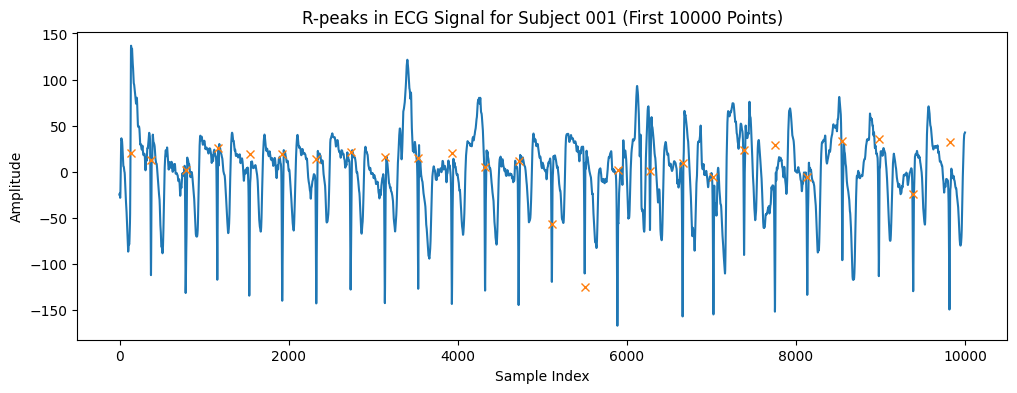

Heart Rate: 80.14 bpm
Heart Rate Variability: 0.07 seconds
Original Heart Rate: 80.14 bpm
Original Heart Rate Variability: 0.07 seconds


In [4]:
#可视化检修模块-Positive
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks
from feature_extraction.hrv import calculate_hr_hrv


# 假设 P_data_SG 和 N_data_SG 已经是滤波后的数据列表
# P_data_SG[0] 和 N_data_SG[0] 分别是正类和负类1号被试的滤波后数据

# 绘制1号被试滤波后的数据（前8000个点）
def plot_ecg(data, title="ECG Data"):
    plt.figure(figsize=(12, 4))
    plt.plot(data[0:10000])  # 修改为只绘制前8000个点
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.show()

# 基线漂移校正函数
def correct_baseline(data, wavelet='db4', level=1):
    # 使用小波变换进行基线估计
    coeffs = pywt.wavedec(data, wavelet, level=level)
    # 将最后一个系数（近似系数，即基线）设置为0
    coeffs[-1] *= 0
    # 重构信号
    corrected_data = pywt.waverec(coeffs, wavelet)
    # 确保校正后的数据长度与原始数据相同
    if len(corrected_data) > len(data):
        corrected_data = corrected_data[:len(data)]
    return corrected_data

# 对对应编号被试的ECG数据进行基线校正
data_number=3 #被试编号
P_data_corrected = correct_baseline(P_data_SG[data_number])

# 对1号被试基线校正后的数据进行绘图（前8000个点）
#plot_ecg(P_data_corrected, "Baseline Corrected ECG Data for Subject 001 (First 8000 Points)")

# Pan-Tompkins算法检测R波
def detect_r_peaks(ecg_signal, sampling_rate=512):
    # 使用Pan-Tompkins算法参数
    diff_signal = np.diff(ecg_signal)
    squared_signal = diff_signal ** 2
    integrated_signal = np.convolve(squared_signal, np.ones(30), mode='same')
    peaks, _ = find_peaks(integrated_signal, distance=sampling_rate * 0.3, height=0.1 * np.max(integrated_signal))
    return peaks
# 定义检测区间
detect_start_point=20000
detect_end_point=30000
# 检测对应被试的R波
r_peaks = detect_r_peaks(P_data_corrected[detect_start_point:detect_end_point])
sampling_rate=512

# 绘制1号被试的前10000个数据点，并标出R波峰值
plt.figure(figsize=(12, 4))
plt.plot(P_data_corrected[detect_start_point:detect_end_point])
plt.plot(r_peaks, P_data_corrected[r_peaks], "x")
plt.title("R-peaks in ECG Signal for Subject 001 (First 10000 Points)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

# 计算心率和心率变异性指标
rr_intervals = np.diff(r_peaks) / sampling_rate  # RR间期，单位为秒
heart_rate = 60 / rr_intervals  # 心率，单位为bpm
heart_rate_variability = np.std(rr_intervals)  # 心率变异性

print(f"Heart Rate: {np.mean(heart_rate):.2f} bpm")
print(f"Heart Rate Variability: {heart_rate_variability:.2f} seconds")

hr_original, hrv_original = calculate_hr_hrv(r_peaks, sampling_rate)
print(f"Original Heart Rate: {hr_original:.2f} bpm")
print(f"Original Heart Rate Variability: {hrv_original:.2f} seconds")


Subject 3 QT Features (Segment 10000-70000):
Mean QTc: 0.51 seconds
QTc Standard Deviation: 0.30 seconds
QTd: 0.27 seconds


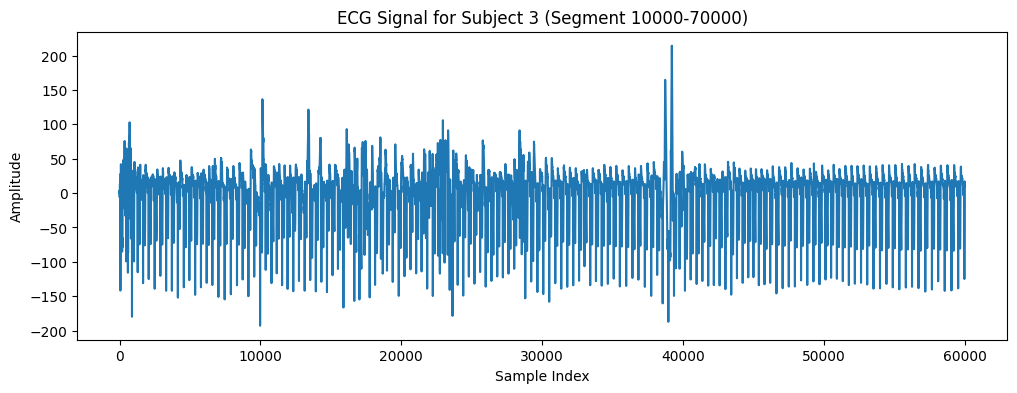

In [6]:
# 可视化检修模块-Positive
import numpy as np
import matplotlib.pyplot as plt
from feature_extraction.qt import extract_qt_features

# 假设 P_data_SG 和 N_data_SG 已经是滤波后的数据列表
# P_data_SG[0] 和 N_data_SG[0] 分别是正类和负类1号被试的滤波后数据

# 绘制 ECG 信号的函数
def plot_ecg(data, title="ECG Data"):
    plt.figure(figsize=(12, 4))
    plt.plot(data)  # 绘制整个数据区间
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.show()

# 定义信号处理的起点和终点
detect_start_point = 10000
detect_end_point = 70000

# 测试一个被试的 QT 特征提取
data_number = 3  # 被试编号
sampling_rate = 512

# 截取指定区间的信号
signal_segment = P_data_SG[data_number][detect_start_point:detect_end_point]

# 提取 QT 特征
qt_features = extract_qt_features(signal_segment, sampling_rate)
qt_features_dict = {}  # 用于保存每个被试的 QT 特征

if qt_features:
    mean_qtc, std_qtc, qtd, _, _ = qt_features
    print(f"Subject {data_number} QT Features (Segment {detect_start_point}-{detect_end_point}):")
    print(f"Mean QTc: {mean_qtc:.2f} seconds")
    print(f"QTc Standard Deviation: {std_qtc:.2f} seconds")
    print(f"QTd: {qtd:.2f} seconds")
    # 保存到字典中
    qt_features_dict[data_number] = (mean_qtc, std_qtc, qtd)
else:
    print(f"QT feature extraction failed for Subject {data_number} (Segment {detect_start_point}-{detect_end_point}).")

# 可视化被试的信号片段
plot_ecg(signal_segment, f"ECG Signal for Subject {data_number} (Segment {detect_start_point}-{detect_end_point})")


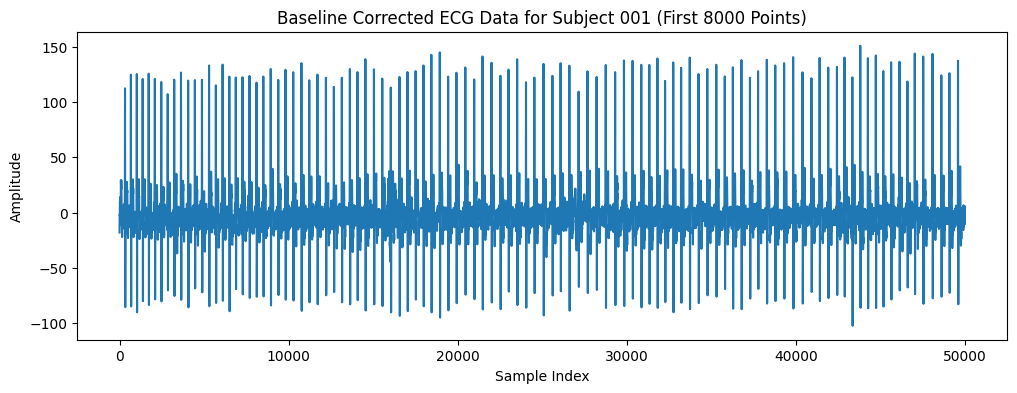

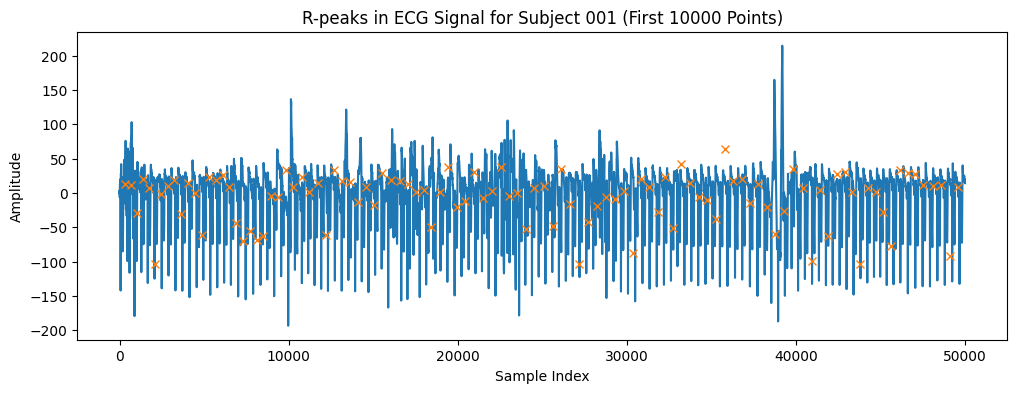

Heart Rate: 65.71 bpm
Heart Rate Variability: 0.10 seconds
Original Heart Rate: 65.71 bpm
Original Heart Rate Variability: 0.10 seconds


In [7]:
#可视化检修模块-Negative
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks

# 假设 P_data_SG 和 N_data_SG 已经是滤波后的数据列表
# P_data_SG[0] 和 N_data_SG[0] 分别是正类和负类1号被试的滤波后数据

# 绘制1号被试滤波后的数据（前8000个点）
def plot_ecg(data, title="ECG Data"):
    plt.figure(figsize=(12, 4))
    plt.plot(data[10000:60000])  # 修改为只绘制前8000个点
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.show()

# 基线漂移校正函数
def correct_baseline(data, wavelet='db4', level=1):
    # 使用小波变换进行基线估计
    coeffs = pywt.wavedec(data, wavelet, level=level)
    # 将最后一个系数（近似系数，即基线）设置为0
    coeffs[-1] *= 0
    # 重构信号
    corrected_data = pywt.waverec(coeffs, wavelet)
    # 确保校正后的数据长度与原始数据相同
    if len(corrected_data) > len(data):
        corrected_data = corrected_data[:len(data)]
    return corrected_data

# 对对应编号被试的ECG数据进行基线校正
data_number=2 #被试编号
N_data_corrected = correct_baseline(N_data_SG[data_number])

# 对1号被试基线校正后的数据进行绘图（前8000个点）
plot_ecg(N_data_corrected, "Baseline Corrected ECG Data for Subject 001 (First 8000 Points)")

# Pan-Tompkins算法检测R波
def detect_r_peaks(ecg_signal, sampling_rate=512):
    # 使用Pan-Tompkins算法参数
    diff_signal = np.diff(ecg_signal)
    squared_signal = diff_signal ** 2
    integrated_signal = np.convolve(squared_signal, np.ones(30), mode='same')
    peaks, _ = find_peaks(integrated_signal, distance=sampling_rate * 0.3, height=0.1 * np.max(integrated_signal))
    return peaks
# 定义检测区间
detect_start_point=10000
detect_end_point=60000
correct_cut_data=N_data_corrected[detect_start_point:detect_end_point]
# 检测对应被试的R波
r_peaks = detect_r_peaks(correct_cut_data)
sampling_rate=512

# 绘制1号被试的前10000个数据点，并标出R波峰值
plt.figure(figsize=(12, 4))
plt.plot(P_data_corrected[detect_start_point:detect_end_point])
plt.plot(r_peaks, P_data_corrected[r_peaks], "x")
plt.title("R-peaks in ECG Signal for Subject 001 (First 10000 Points)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

# 计算心率和心率变异性指标
rr_intervals = np.diff(r_peaks) / sampling_rate  # RR间期，单位为秒
heart_rate = 60 / rr_intervals  # 心率，单位为bpm
heart_rate_variability = np.std(rr_intervals)  # 心率变异性

print(f"Heart Rate: {np.mean(heart_rate):.2f} bpm")
print(f"Heart Rate Variability: {heart_rate_variability:.2f} seconds")

hr_original, hrv_original = calculate_hr_hrv(r_peaks, sampling_rate)
print(f"Original Heart Rate: {hr_original:.2f} bpm")
print(f"Original Heart Rate Variability: {hrv_original:.2f} seconds")

In [12]:
    from feature_extraction.hrv import calculate_hr_hrv
    from feature_extraction.qt import extract_qt_features
    # 初始化特征矩阵和舍弃掉的内容矩阵
    P_features_matrix = []
    N_features_matrix = []
    abandon_matrix = []
    # 剪切的起始和终止点
    cut_start = 10000
    cut_end = 60000
    # 处理所有被试的数据
    for subject, data_dict in P_data.items():
        # 获取实际的数据
        data = data_dict['data']
        data_cut = data[cut_start:cut_end]
        
        # 基线校正
        corrected_data = correct_baseline(data_cut)
        # R波检测
        r_peaks = detect_r_peaks(corrected_data)
        # 心率和心率变异性计算
        heart_rate, heart_rate_variability = calculate_hr_hrv(r_peaks)
        
        # 提取QT特征
        qt_features = extract_qt_features(corrected_data, sampling_rate)
        
        if qt_features:
            mean_qtc, std_qtc, qtd, qt_intervals, rr_intervals = qt_features
            print(f"Subject {subject}: QT Intervals: {qt_intervals}, RR Intervals: {rr_intervals}")
            if 0 <= heart_rate_variability <= 1:
                # 打印结果
                print(f"Subject {subject}: Heart Rate: {heart_rate:.2f} bpm, Heart Rate Variability: {heart_rate_variability:.2f} seconds, QTc Interval: {mean_qtc:.2f}, QT Dispersion: {qtd:.2f}")
                # 添加到特征矩阵
                P_features_matrix.append([heart_rate, heart_rate_variability, mean_qtc, qtd])
            else:
                print(f"第 {subject} 号被试心率变异性异常，对该被试予以舍弃")
                # 添加到删除矩阵
                abandon_matrix.append([subject])
        else:
            print(f"第 {subject} 号被试QT特征提取失败，对该被试予以舍弃")
            abandon_matrix.append([subject])

    for subject, data_dict in N_data.items():
        # 获取实际的数据
        data = data_dict['data']
        data_cut = data[cut_start:cut_end]
        # 基线校正
        corrected_data = correct_baseline(data_cut)
        # R波检测
        r_peaks = detect_r_peaks(corrected_data)
        # 心率和心率变异性计算
        heart_rate, heart_rate_variability = calculate_hr_hrv(r_peaks)
        
        # 提取QT特征
        qt_features = extract_qt_features(corrected_data, sampling_rate)
        
        
        if qt_features:
            mean_qtc, std_qtc, qtd, qt_intervals, rr_intervals = qt_features
            print(f"Subject {subject}: QT Intervals: {qt_intervals}, RR Intervals: {rr_intervals}")
            if 0 <= heart_rate_variability <= 1:
                # 打印结果
                print(f"Subject {subject}: Heart Rate: {heart_rate:.2f} bpm, Heart Rate Variability: {heart_rate_variability:.2f} seconds, QTc Interval: {mean_qtc:.2f}, QT Dispersion: {qtd:.2f}")
                # 添加到特征矩阵
                N_features_matrix.append([heart_rate, heart_rate_variability, mean_qtc, qtd])
            else:
                print(f"第 {subject} 号被试心率变异性异常，对该被试予以舍弃")
                # 添加到删除矩阵
                abandon_matrix.append([subject])
        else:
            print(f"第 {subject} 号被试QT特征提取失败，对该被试予以舍弃")
            abandon_matrix.append([subject])

    # 将特征矩阵转换为NumPy数组
    P_features_matrix = np.array(P_features_matrix)
    N_features_matrix = np.array(N_features_matrix)

    # 保存特征矩阵到文件
    with open('P_features_matrix.pkl', 'wb') as f:
        pickle.dump(P_features_matrix, f)
    print(f"阳性特征矩阵已保存到 P_features_matrix.pkl")
    with open('N_features_matrix.pkl', 'wb') as f:
        pickle.dump(N_features_matrix, f)
    print(f"阴性特征矩阵已保存到 N_features_matrix.pkl")
    # 保存丢弃矩阵到文件
    with open('abandon_matrix.pkl', 'wb') as f:
        pickle.dump(abandon_matrix, f)
    print(f"丢弃矩阵已保存到 abandon_matrix.pkl")

Subject 001: QT Intervals: [1.390625, 0.673828125, 1.322265625, 1.3203125, 0.640625, 1.228515625, 1.220703125, 1.201171875, 0.591796875, 1.16015625, 1.16796875, 1.1640625, 1.158203125, 1.166015625, 1.220703125, 1.29296875, 1.294921875, 1.2890625, 1.29296875, 0.625, 1.1953125, 1.1953125, 1.205078125, 1.20703125, 1.197265625, 1.19140625, 1.22265625, 1.2578125, 1.2421875, 1.20703125, 1.26171875, 1.357421875, 1.404296875, 1.34765625, 1.28515625, 1.3125, 1.36328125, 1.341796875, 1.275390625, 1.263671875, 1.306640625, 1.345703125, 1.31640625, 1.29296875, 1.341796875, 1.36328125, 1.306640625, 1.279296875, 1.31640625, 1.353515625, 1.31640625, 1.287109375, 1.318359375, 1.390625, 1.451171875, 1.376953125, 1.318359375, 1.337890625, 1.373046875, 1.37890625, 0.66796875, 1.248046875, 1.2578125, 1.28515625, 1.28515625, 1.33203125, 1.412109375, 0.705078125, 0.82421875, 1.462890625, 1.50390625, 1.484375, 1.453125, 1.458984375, 1.4609375, 1.470703125, 1.427734375, 1.416015625, 1.423828125, 1.330078125, 

TypeError: '<=' not supported between instances of 'int' and 'NoneType'

In [8]:
    #成批处理数据
    import numpy as np
    import pickle
    import pywt
    from scipy.signal import find_peaks, savgol_filter
    from feature_extraction import r_peak_detection
    from feature_extraction.qt import detect_qt_wavelets, detect_qt_interval, extract_qt_features
    
    # 基线漂移校正函数
    def correct_baseline(data, wavelet='db4', level=1):
        # 使用小波变换进行基线估计
        coeffs = pywt.wavedec(data, wavelet, level=level)
        # 将最后一个系数（近似系数，即基线）设置为0
        coeffs[-1] *= 0
        # 重构信号
        corrected_data = pywt.waverec(coeffs, wavelet)
        # 确保校正后的数据长度与原始数据相同
        if len(corrected_data) > len(data):
            corrected_data = corrected_data[:len(data)]
        return corrected_data
    
    # 计算心率和心率变异性指标
    def calculate_hr_hrv(r_peaks, sampling_rate=512):
        rr_intervals = np.diff(r_peaks) / sampling_rate  # RR间期，单位为秒
        heart_rate = 60 / rr_intervals  # 心率，单位为bpm
        heart_rate_variability = np.std(rr_intervals)  # 心率变异性
        return np.mean(heart_rate), heart_rate_variability

    
    # 初始化特征矩阵和舍弃掉的内容矩阵
    P_features_matrix = []
    N_features_matrix = []
    abandon_matrix = []
    # 剪切的起始和终止点
    cut_start = 10000
    cut_end = 60000
    # 处理所有被试的数据
    for subject, data_dict in P_data.items():
        # 获取实际的数据
        data = data_dict['data']
        data_cut = data[cut_start:cut_end]
    
        # 基线校正
        corrected_data = correct_baseline(data_cut)
        # R波检测
        r_peaks = detect_r_peaks(corrected_data)
        # 心率和心率变异性计算
        heart_rate, heart_rate_variability = calculate_hr_hrv(r_peaks)

        qt_intervals = []
        for peak_idx in range(len(r_peaks) - 1):
            # 提取Q波起点和T波终点
            _, q_peak, t_peak = detect_qt_wavelets(corrected_data[r_peaks[peak_idx]:r_peaks[peak_idx + 1]])
            q_peak += r_peaks[peak_idx]  # 转换为在原始校正后信号中的绝对位置
            t_peak += r_peaks[peak_idx]
            # 计算Q-T间期长度
            qt_interval = detect_qt_interval(q_peak, t_peak)
            qt_intervals.append(qt_interval)
    
        if qt_intervals:
            # # 计算平均Q-T间期用于QTc计算（这里简单取平均，实际可按更合理方式结合RR等）
            # mean_qt_interval = np.mean(qt_intervals)
            # # 计算QTc间期（假设RR_interval固定，实际需正确传入对应RR值）
            # qtc_interval = detect_qtc_interval(mean_qt_interval, 1)  # 此处RR_interval暂设为1，需修改为真实值
            # # 计算QT离散度
            # qt_dispersion = calculate_qt_dispersion(qt_intervals)
            qtc_interval, _, qt_dispersion = qt_features

            if (heart_rate_variability >= 0 and heart_rate_variability <= 1):
                # 打印结果
                print(f"Subject {subject}: Heart Rate: {heart_rate:.2f} bpm, Heart Rate Variability: {heart_rate_variability:.2f} seconds, QTc Interval: {qtc_interval:.2f}, QT Dispersion: {qt_dispersion:.2f}")
                # 添加到特征矩阵
                P_features_matrix.append([heart_rate, heart_rate_variability, qtc_interval, qt_dispersion])
            else:
                print(f"第 {subject} 号被试心率变异性异常，对该被试予以舍弃")
                # 添加到删除矩阵
                abandon_matrix.append([subject])
        else:
            print(f"第 {subject} 号被试Q-T间期数据获取异常，对该被试予以舍弃")
            abandon_matrix.append([subject])
    
    for subject, data_dict in N_data.items():
        # 获取实际的数据
        data = data_dict['data']
        data_cut = data[cut_start:cut_end]
        # 基线校正
        corrected_data = correct_baseline(data_cut)
        # R波检测
        r_peaks = detect_r_peaks(corrected_data)
        # 心率和心率变异性计算
        heart_rate, heart_rate_variability = calculate_hr_hrv(r_peaks)
    
        qt_intervals = []
        for peak_idx in range(len(r_peaks) - 1):
            # 提取Q波起点和T波终点
            q_peak, t_peak = detect_qt_wavelets(corrected_data[r_peaks[peak_idx]:r_peaks[peak_idx + 1]])
            q_peak += r_peaks[peak_idx]  # 转换为在原始校正后信号中的绝对位置
            t_peak += r_peaks[peak_idx]
            # 计算Q-T间期长度
            qt_interval = detect_qt_interval(q_peak, t_peak)
            qt_intervals.append(qt_interval)
    
        if qt_intervals:
            # # 计算平均Q-T间期用于QTc计算（这里简单取平均，实际可按更合理方式结合RR等）
            # mean_qt_interval = np.mean(qt_intervals)
            # # 计算QTc间期（假设RR_interval固定，实际需正确传入对应RR值）
            # qtc_interval = calculate_qtc_interval(mean_qt_interval, 1)  # 此处RR_interval暂设为1，需修改为真实值
            # # 计算QT离散度
            # qt_dispersion = calculate_qt_dispersion(qt_intervals)
            qtc_interval, _, qt_dispersion = qt_features
    
            if (heart_rate_variability >= 0 and heart_rate_variability <= 1):
                # 打印结果
                print(f"Subject {subject}: Heart Rate: {heart_rate:.2f} bpm, Heart Rate Variability: {heart_rate_variability:.2f} seconds, QTc Interval: {qtc_interval:.2f}, QT Dispersion: {qt_dispersion:.2f}")
                # 添加到特征矩阵
                N_features_matrix.append([heart_rate, heart_rate_variability, qtc_interval, qt_dispersion])
            else:
                print(f"第 {subject} 号被试心率变异性异常，对该被试予以舍弃")
                # 添加到删除矩阵
                abandon_matrix.append([subject])
        else:
            print(f"第 {subject} 号被试Q-T间期数据获取异常，对该被试予以舍弃")
            abandon_matrix.append([subject])
    
    # 将特征矩阵转换为NumPy数组
    P_features_matrix = np.array(P_features_matrix)
    N_features_matrix = np.array(N_features_matrix)
    
    # 保存特征矩阵到文件
    with open('P_features_matrix.pkl', 'wb') as f:
        pickle.dump(P_features_matrix, f)
    print(f"阳性特征矩阵已保存到 P_features_matrix.pkl")
    with open('N_features_matrix.pkl', 'wb') as f:
        pickle.dump(N_features_matrix, f)
    print(f"阴性特征矩阵已保存到 N_features_matrix.pkl")
    # 保存丢弃矩阵到文件
    with open('abandon_matrix.pkl', 'wb') as f:
        pickle.dump(abandon_matrix, f)
    print(f"丢弃矩阵已保存到 abandon_matrix.pkl")

TypeError: object of type 'numpy.int64' has no len()

In [ ]:
import pandas as pd
import numpy as np

# 加载阳性特征矩阵
with open('P_features_matrix.pkl', 'rb') as f:
    P_features_matrix = np.array(pickle.load(f))

# 加载阴性特征矩阵
with open('N_features_matrix.pkl', 'rb') as f:
    N_features_matrix = np.array(pickle.load(f))

# 重塑阳性特征矩阵为一行（这里假设每个样本的特征是按行存储的，根据实际情况可能需要调整）
P_reshaped = P_features_matrix.reshape(-1, 4) if P_features_matrix.size > 0 else np.array([])
print(P_reshaped)
# 重塑阴性特征矩阵为一行（同理）
N_reshaped = N_features_matrix.reshape(-1, 4) if N_features_matrix.size > 0 else np.array([])

# 创建对应的标签，阳性为1，阴性为0
P_labels = np.ones((P_reshaped.shape[0],1)) if P_reshaped.size > 0 else np.array([])
N_labels = np.zeros((N_reshaped.shape[0],1)) if N_reshaped.size > 0 else np.array([])
print(P_labels)
print(N_labels)

In [ ]:
# 合并特征矩阵和对应的标签
if P_reshaped.size > 0 and N_reshaped.size > 0:
    combined_P_data = np.concatenate((P_reshaped, P_labels), axis=1)
    combined_N_data = np.concatenate((N_reshaped, N_labels), axis=1)
    combined_data = np.concatenate((combined_P_data,combined_N_data), axis=0)
    print(combined_data)
elif P_reshaped.size > 0:
    combined_data = P_reshaped
    combined_labels = P_labels
elif N_reshaped.size > 0:
    combined_data = N_reshaped
    combined_labels = N_labels
else:
    raise ValueError("Both positive and negative feature matrices are empty.")

# 将合并后的数据转换为DataFrame，并添加列名和标签列名
feature_names = [f'Feature_{i}' for i in range(combined_data.shape[1])]
feature_names[-1]='Label'
combined_df = pd.DataFrame(combined_data, columns=feature_names)
print(combined_df)
combined_df_2 = combined_df

# 不同模型的训练

In [ ]:
#随机森林

# 假设 combined_df_2 是你已经准备好的数据集
X = combined_df_2.drop(columns='Label')
y = combined_df_2['Label']

# 五折交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(
    
    n_estimators=20,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=None,
    random_state=42
)

# 存储指标
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"Training Fold {fold}...")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 计算指标
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # 存储指标
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    roc_aucs.append(roc_auc)

    # 打印每一折的结果
    print(f"Fold {fold} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}\n")

# 计算平均指标
print("Average Metrics:")
print("Accuracy: ", np.mean(accuracies))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1s))
print("ROC AUC: ", np.mean(roc_aucs))

# 存储最终的真实值和预测值
y_true = []
y_pred = []
y_prob = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"Evaluating Fold {fold}...")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred_fold = model.predict(X_test)
    y_prob_fold = model.predict_proba(X_test)[:, 1]

    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    y_prob.extend(y_prob_fold)

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#KNN

import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# 假设 combined_df_2 是你已经准备好的数据集
X = combined_df_2.drop(columns='Label')
X.fillna(0, inplace=True)
y = combined_df_2['Label']

# 创建一个k折交叉验证对象 取5折
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化数据。KNN算法对于数据的尺度很敏感，因此通常需要进行标准化处理。
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建模型
model = KNeighborsClassifier()
#model = KNeighborsClassifier(n_neighbors=5)

# 使用GridSearchCV来寻找最佳的K值
param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# 获取最佳K值
best_k = grid_search.best_params_['n_neighbors']
print(f"Best K value: {best_k}")

# 使用最佳K值创建新模型
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)


#使用交叉验证训练模型并评估性能
scores = cross_val_score(best_model, X, y, cv=kfold)

for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")
print("Mean Accuracy:", scores.mean())

# 存储指标
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

# 存储最终的真实值和预测值
y_true = []
y_pred = []
y_prob = []

for train_index, test_index in skf.split(X, y):
    X_train_scaled, X_test_scaled = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_model.fit(X_train_scaled, y_train)
    y_pred_fold = best_model.predict(X_test_scaled)
    y_prob_fold = best_model.predict_proba(X_test_scaled)[:, 1]

    # 计算指标
    accuracies.append(accuracy_score(y_test, y_pred_fold))
    precisions.append(precision_score(y_test, y_pred_fold))
    recalls.append(recall_score(y_test, y_pred_fold))
    f1s.append(f1_score(y_test, y_pred_fold))
    roc_aucs.append(roc_auc_score(y_test, y_prob_fold))

    # 存储真实值和预测值
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    y_prob.extend(y_prob_fold)
# 计算平均指标
print("Accuracy: ", np.mean(accuracies))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1s))
print("ROC AUC: ", np.mean(roc_aucs))

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#随机森林搜索参数 时间太长

# 假设 full_df_color 是你已经准备好的数据集
#X = full_df_color.drop(columns='Label')
#y = full_df_color['Label']
X = combined_df_2.drop(columns='Label')
X.fillna(0, inplace=True)
y = combined_df_2['Label']
# 定义参数网格
param_grid = {
    'n_estimators': [100, 200, 300],   #400已测试过效果不好
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None]
}

# 创建随机森林模型
model = RandomForestClassifier(random_state=42)

# 使用 GridSearchCV 进行参数优化，设置 verbose=2 以显示进程信息
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)

# 使用最佳参数重新训练模型
best_model = grid_search.best_estimator_

# 五折交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 存储指标
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"Training Fold {fold}...")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    # 计算指标
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))
    roc_aucs.append(roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

# 计算平均指标
print("Accuracy: ", np.mean(accuracies))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1s))
print("ROC AUC: ", np.mean(roc_aucs))

# 存储最终的真实值和预测值
y_true = []
y_pred = []
y_prob = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"Evaluating Fold {fold}...")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_model.fit(X_train, y_train)
    y_pred_fold = best_model.predict(X_test)
    y_prob_fold = best_model.predict_proba(X_test)[:, 1]

    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    y_prob.extend(y_prob_fold)

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#逻辑回归模型

# 假设 full_df_color 是你已经准备好的数据集
#X = full_df_color.drop(columns='Label')
#y = full_df_color['Label']
X = combined_df_2.drop(columns='Label')
X.fillna(0, inplace=True)
y = combined_df_2['Label']
# 五折交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(
    C=100,
    max_iter=100,
    penalty='l1',
    solver='liblinear',
    random_state=42
)

# 存储指标
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

# 存储最终的真实值和预测值
y_true = []
y_pred = []
y_prob = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred_fold = model.predict(X_test)
    y_prob_fold = model.predict_proba(X_test)[:, 1]

    # 计算指标
    accuracies.append(accuracy_score(y_test, y_pred_fold))
    precisions.append(precision_score(y_test, y_pred_fold))
    recalls.append(recall_score(y_test, y_pred_fold))
    f1s.append(f1_score(y_test, y_pred_fold))
    roc_aucs.append(roc_auc_score(y_test, y_prob_fold))

    # 存储真实值和预测值
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    y_prob.extend(y_prob_fold)

# 计算平均指标
print("Accuracy: ", np.mean(accuracies))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1s))
print("ROC AUC: ", np.mean(roc_aucs))

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#逻辑回归 查最优参数
# 假设 full_df_color 是你已经准备好的数据集
#X = full_df_color.drop(columns='Label')
#y = full_df_color['Label']
X = combined_df_2.drop(columns='Label')
X.fillna(0, inplace=True)
y = combined_df_2['Label']
# 定义参数网格
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# 创建逻辑回归模型
model = LogisticRegression(random_state=42)

# 创建网格搜索对象，设置 verbose=2
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# 拟合数据以查找最佳参数
grid_search.fit(X, y)

# 查看最优参数和得分
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 使用最优参数训练模型（如果需要）
best_model = grid_search.best_estimator_

In [ ]:
#AdaBoost 模型

# 假设 full_df_color 是你已经准备好的数据集
X = full_df_color.drop(columns='Label')
y = full_df_color['Label']

# 五折交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    learning_rate=1,
    n_estimators=50,
    algorithm='SAMME',  # 使用 SAMME 算法
    random_state=42
)

# 存储指标
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

# 存储最终的真实值和预测值
y_true = []
y_pred = []
y_prob = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred_fold = model.predict(X_test)
    y_prob_fold = model.predict_proba(X_test)[:, 1]

    # 计算指标
    accuracies.append(accuracy_score(y_test, y_pred_fold))
    precisions.append(precision_score(y_test, y_pred_fold))
    recalls.append(recall_score(y_test, y_pred_fold))
    f1s.append(f1_score(y_test, y_pred_fold))
    roc_aucs.append(roc_auc_score(y_test, y_prob_fold))

    # 存储真实值和预测值
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    y_prob.extend(y_prob_fold)

# 计算平均指标
print("Accuracy: ", np.mean(accuracies))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1s))
print("ROC AUC: ", np.mean(roc_aucs))

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#AdaBoost搜索参数
# 假设 full_df_color 是你已经准备好的数据集
X = full_df_color.drop(columns='Label')
y = full_df_color['Label']

# 定义参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

# 创建模型
model = AdaBoostClassifier(algorithm='SAMME', random_state=42)

# 创建 GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)

# 进行参数搜索
grid_search.fit(X, y)

# 输出最佳参数
print("Best Parameters: ", grid_search.best_params_)

In [ ]:
#梯度提升分类器

# 假设 full_df_color 是你已经准备好的数据集
X = full_df_color.drop(columns='Label')
y = full_df_color['Label']

# 五折交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = GradientBoostingClassifier(
    learning_rate=0.2,
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=150,
    random_state=42
)

# 存储指标
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

# 存储最终的真实值和预测值
y_true = []
y_pred = []
y_prob = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred_fold = model.predict(X_test)
    y_prob_fold = model.predict_proba(X_test)[:, 1]

    # 计算指标
    accuracies.append(accuracy_score(y_test, y_pred_fold))
    precisions.append(precision_score(y_test, y_pred_fold))
    recalls.append(recall_score(y_test, y_pred_fold))
    f1s.append(f1_score(y_test, y_pred_fold))
    roc_aucs.append(roc_auc_score(y_test, y_prob_fold))

    # 存储真实值和预测值
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    y_prob.extend(y_prob_fold)

# 计算平均指标
print("Accuracy: ", np.mean(accuracies))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1s))
print("ROC AUC: ", np.mean(roc_aucs))

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#梯度提升分类器 参数
# 假设 full_df_color 是你已经准备好的数据集
X = full_df_color.drop(columns='Label')
y = full_df_color['Label']

# 定义模型
model = GradientBoostingClassifier(random_state=42)

# 定义参数网格
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 使用 GridSearchCV 查找最优参数
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2)
grid_search.fit(X, y)

# 打印最优参数
print("Best Parameters: ", grid_search.best_params_)

In [ ]:
#MLP

# 假设 full_df_color 是你已经准备好的数据集
X = full_df_color.drop(columns='Label')
y = full_df_color['Label']

# 五折交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = MLPClassifier(random_state=42, max_iter=500)

# 存储指标
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

# 存储最终的真实值和预测值
y_true = []
y_pred = []
y_prob = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred_fold = model.predict(X_test)
    y_prob_fold = model.predict_proba(X_test)[:, 1]

    # 计算指标
    accuracies.append(accuracy_score(y_test, y_pred_fold))
    precisions.append(precision_score(y_test, y_pred_fold))
    recalls.append(recall_score(y_test, y_pred_fold))
    f1s.append(f1_score(y_test, y_pred_fold))
    roc_aucs.append(roc_auc_score(y_test, y_prob_fold))

    # 存储真实值和预测值
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    y_prob.extend(y_prob_fold)

# 计算平均指标
print("Accuracy: ", np.mean(accuracies))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1s))
print("ROC AUC: ", np.mean(roc_aucs))

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# 处理过程中的一些其他代码

In [ ]:
## 单张图展示 看一下滤波效果 （SG滤波）   略有效果
# 假设你要处理的 DataFrame 是 P_data 中的第一个 DataFrame
df = P_data[5]  # 选择第一个 DataFrame

# 计算每一行第三列至倒数第二列的数值之和
y_values = df.iloc[:, 2:-1].sum(axis=1)  # 取第三列到倒数第二列的和
x_values = df.iloc[:, 1]  # 第二列为横坐标

# 应用 Savitzky-Golay 滤波
window_length = 11  # 窗口长度，必须为奇数
polyorder = 3      # 多项式阶数
filtered_y_values = savgol_filter(y_values, window_length, polyorder)
# 处理负值，将负值替换为 0
filtered_y_values = np.where(filtered_y_values < 0, 0, filtered_y_values)

# 针对特定区域（25到40）进行更强平滑滤波
specific_region = (x_values >= 25) & (x_values <= 45)

# 应用中值滤波，窗口大小可以根据需要调整
filtered_y_values[specific_region] = medfilt(filtered_y_values[specific_region], kernel_size=7)


# 绘制原始数据和滤波后的数据
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, linestyle='-', color='r', label='Original Data')  # 原始数据
plt.plot(x_values, filtered_y_values, color='b', label='Filtered Data')  # 滤波后的数据
plt.title('Chromatogram with Savitzky-Golay Filtering')
plt.xlabel('Retention Time')
plt.ylabel('Relative Intensity')
plt.legend()
plt.grid()
plt.tight_layout()  # 自动调整布局
plt.show()


In [ ]:
#保存一下SG滤波后的图片
#创建存储图像的文件夹
output_folder = 'filtered_chromatograms'
os.makedirs(output_folder, exist_ok=True)

# 循环遍历每个 DataFrame，使用 tqdm 显示进度
for i, df in enumerate(tqdm(N_data, desc="Processing Chromatograms")):
    # 计算每一行第三列至倒数第二列的数值之和
    y_values = df.iloc[:, 2:-1].sum(axis=1)  # 取第三列到倒数第二列的和
    x_values = df.iloc[:, 1]  # 第二列为横坐标

    # 应用 Savitzky-Golay 滤波
    window_length = 11  # 窗口长度，必须为奇数
    polyorder = 3      # 多项式阶数
    filtered_y_values = savgol_filter(y_values, window_length, polyorder)
    
    # 处理负值，将负值替换为 0
    filtered_y_values = np.where(filtered_y_values < 0, 0, filtered_y_values)

    # 针对特定区域（25到40）进行更强平滑滤波
    specific_region = (x_values >= 25) & (x_values <= 45)
    
    # 应用中值滤波，窗口大小可以根据需要调整
    filtered_y_values[specific_region] = medfilt(filtered_y_values[specific_region], kernel_size=7)

    # 绘制原始数据和滤波后的数据
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, linestyle='-', color='r', label='Original Data')  # 原始数据
    plt.plot(x_values, filtered_y_values, color='b', label='Filtered Data')  # 滤波后的数据
    plt.title(f'N Chromatogram {i+1} with Savitzky-Golay Filtering')
    plt.xlabel('Retention Time')
    plt.ylabel('Relative Intensity')
    plt.legend()
    plt.grid()
    plt.tight_layout()  # 自动调整布局

    # 保存图像
    plt.savefig(os.path.join(output_folder, f'N_chromatogram_{i+1}.png'))
    plt.close()  # 关闭当前图形以节省内存


In [ ]:
#中值滤波
df = P_data[10]  # 选择第一个 DataFrame

# 计算每一行第三列至倒数第二列的数值之和
y_values = df.iloc[:, 2:-1].sum(axis=1)  # 取第三列到倒数第二列的和
x_values = df.iloc[:, 1]  # 第二列为横坐标

# 应用中值滤波
kernel_size = 11  # 窗口大小，必须为奇数
filtered_y_values = medfilt(y_values, kernel_size)

# 处理负值，将负值替换为 0
filtered_y_values = np.where(filtered_y_values < 0, 0, filtered_y_values)

# 绘制原始数据和滤波后的数据
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, linestyle='-', color='r', label='Original Data')  # 原始数据
plt.plot(x_values, filtered_y_values, color='b', label='Filtered Data')  # 滤波后的数据
plt.title('Chromatogram with Median Filtering')
plt.xlabel('Retention Time')
plt.ylabel('Relative Intensity')
plt.legend()
plt.grid()
plt.tight_layout()  # 自动调整布局
plt.show()

In [ ]:
## 单张图展示 看一下滤波效果 （小波变换）   没什么效果
# 假设你要处理的 DataFrame 是 P_data 中的第一个 DataFrame
df = N_data[0]  # 选择第一个 DataFrame

# 计算每一行第三列至倒数第二列的数值之和
y_values = df.iloc[:, 2:-1].sum(axis=1)  # 取第三列到倒数第二列的和
x_values = df.iloc[:, 1]  # 第二列为横坐标

# 进行小波变换（这里使用离散小波变换，选择 Daubechies 小波）
wavelet = 'db5'  # 可以根据需要选择不同的小波
coeffs = pywt.wavedec(y_values, wavelet, level=None)

# 重建信号，通常使用低频系数（近似）
filtered_y_values = pywt.waverec(coeffs, wavelet)

# 绘制原始数据和小波变换后的数据
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, linestyle='-', color='r', label='Original Data')  # 原始数据
plt.plot(x_values, filtered_y_values[:len(y_values)], color='b', label='Filtered Data')  # 滤波后的数据
plt.title('Chromatogram with Wavelet Transform Filtering')
plt.xlabel('Retention Time')
plt.ylabel('Relative Intensity')
plt.legend()
plt.grid()
plt.tight_layout()  # 自动调整布局
plt.show()

In [ ]:
#测试一下结构
print(P_data_SG[1])
print(P_data_SG[1].iloc[29])

In [ ]:
print(P_df_color)

In [ ]:
print(P_data)

In [ ]:
print(P_data_feature)

In [ ]:
print(N_data_feature[0])

In [ ]:
print(normalized_N_data_feature) 

In [ ]:
print(remove_normalized_N_data_feature)

In [ ]:
print(len(remove_normalized_P_data_feature))

In [ ]:
print(P_df_color)

In [ ]:
print(full_df_color)